# 信息熵

$H(X)=-\sum_{i=1}^m p_{i}log_{2}(p_{i})$

上述公式 $H(X)$ 叫做随机变量X的信息熵,大于0

## 比特化



#### 将数据转化为01二进制流来传输
- 对于原始数据流中的元数据，例如字符，出现次数比较多的字符，使用比较短的二进制位流来表示
- 每个字符出现的次数乘以该字符在整个流中出现的频率(此时也可作概率)，并求和，可得到每个字符在整个流中被表示为二进制位流的平均长度
- 上述的平均长度或期望表征了该比特化过程中，一种信息特征，该特征越小，表示比特化的效果越好
- 比特化的公式反应的和信息熵所表征的信息基本上是一致的
- 比特化中的平均字符长度越小，信息越少

#### 一般来说，一个系统越稳定，所蕴含的信息越多，信息熵越大
#### 这里的稳定意思是指，变量中，各种样本或者事件出现的可能性均等，没有个别的事件会以明显区别于其他事件较大或者较小的概率出现的情况，这种情况下，事件的分布趋于均匀分布，此时交叉熵最大，所含的信息最多。
#### 信息最多，抛硬币事件蕴含信息量大，而冬天需要穿到毛衣这种事件属于大概率事件或者明天太阳会从东方升起，基本属于必然事件，从信息量上理解，这种事件，能够提供到的有效信息基本等同于0，可以说蕴含的信息很少


- 高信息熵：出现事件等值概率
- 低信息熵：出现事件可能性不等值

### 条件熵 $H(Y|X)$

#### 在给定X条件下，所有不同的X值得情况下Y的信息熵的平均值叫做条件熵

$H(Y|X)=\sum_{i=1}P(X=v_i)H(Y|X=v_i)$



#### 通过推导还能够得到下面的公式

$H(Y|X) = H(X,Y)-H(X)$

 $\sum_{i=1}^n a_i=0$
$f(x)=x^{x^x}$

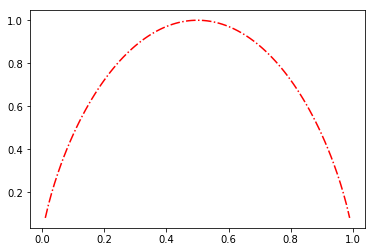

In [1]:
## 测试交叉熵与概率分布的关系
import math
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt


p1 = numpy.arange(0.01,1,0.01)
y1 = [ -1 * pi * math.log(pi)/math.log(2) for pi in p1]
p2 = 1-p1
y2 = [ -1 * pi * math.log(pi)/math.log(2) for pi in p2]
y = [yi + yj for yi, yj in zip(y1,y2)]
plt.plot(p1,y,'r-.')
plt.show()


# 决策树

- 决策树是在一致各种情况发生概率的基础上，通过构建决策树来进行分析的一种方式，是一种直观应用概率分析的一种图解方法
- 决策树是一种预测模型，代表的是队形模型属性与对象值之间的映射关系
- 决策树是一种属性结构，其中各个内部节点表示一个属性的测试，每个分支表示一个测试输出，每个叶子节点代表一种类别
- 决策树是有一种非常常用的有监督的分类算法


- 决策树的决策过程就是从根节点开始，测试待分类项中对应的特诊属性，并按照其值选择输出分支，直到叶子节点，将叶子节点的存放的类型作为决策结果


- 决策树分为两大类：分类树和回归树，前者用于分类标签值，后者用于预测连续值，常用的方法有：ID3、C4.5、CART(分类回归树)


## 决策树的构造过程

- 决策树算法的重点就是决策树的构造；决策树的构造就是进行属性选择度量，确定各个特征属性之间的拓扑结构(树结构)
- 构建决策树的关键步骤就是分裂属性，分裂属性是指的在某个节点按照某一类特征属性的不同划分构建不同的分支，其目标及时让各个分裂子集尽可能得‘纯’(让一个分裂子类中待分类的项尽可能得属于同一个类别)

##### 构建步骤如下：

- 将所有的特征看成一个一个的节点：
- 遍历当前特征的每一种分割方式，找到最好的分割点;找到最好的分割点;将数据划分为不同的子节点；并且计算划分后的所有子节点的纯度信息
- 对第2步的产生的分割，选择出最优的特征以及最优的划分方式；得出最终的子节点
- 对子节点 分别继续执行2-3步，知直到每个最终的子节点都足够的纯

#### 决策树特征属性类型
- 属性是离散的，而且不要求生成的是二叉决策树，此时一个属性就是一个分支
- 属性是离散的，并且要求生成的是二叉决策树，此时使用属性划分的子集进行测试，按照属于子集与不属于子集分成两个分支
- 属性是连续的，可以确定一个值作为分割点split_point,按照 > split_point 和 <= split_point 生成两个分支

- 决策树算法是一种"贪心"算法策略，只考虑在当前数据特征情况下的最好分割方式，不能进行回溯操作



### 决策树量化纯度

####  决策树的纯度，通常用三种计算方式来表示：Gini系数，熵，错误率

$Gini = 1 - \sum_{i=1}^{n}P^2(i)$

$H(Entropy)=-\sum_{i=1}^{n}P(i)log_2(P(i))$

$Error = 1 - Max_{i=1}^n{P(i)}$


- 上述三种指标数值越高，数据越不纯，数值越低数据越纯

- 以第一个计算方式Gini系数为例，当概率均等的时候，$\sum_{i=1}^{n}P^2(i)$最小，Gini系数最大，此时越不纯

#### 信息熵为例

当计算出各个特征属性的量化纯度值后使用信息增益度来标志选择出当前数据集的分割特征属性;如果信息增益度越大，表示在该特征属性上会损失的纯度越大，那么该属性就越应该在决策树的上层，计算公式为：

$Gain = \Delta = H(D) - H(D|A)$

Gain 为 A为特征对训练数据集的信息增益，它为集合D的经验熵H(D)与特征A给定条件下D的经验条件熵H(D|A)之差

### 决策树算法的停止条件

#####  决策树构建的过程时一个递归的过程，所以必须给定停止条件，否则该过程将不会停止，一般情况下有两种停止条件:

- 当每个子节点只有一种类型的时候停止构建
- 当前节点中的记录小于某个阈值，同时迭代次数达到给定值，停止构建过程，此时使用$max(P(i))$作为节点的对应类型
##### 上述第一个条件会使节点过多，导致过拟合(overfit)等问题发生；比较常用的方式时使用第二个条件作为停止条件

### 决策树算法效果评估

#### 一般的分类方法评估方法均使适用，例如采用混淆矩阵来计算准确率、召回率、精确率等指标
#### 也可以采用叶子节点的纯度值总和来评估算法的效果，值越小，越好

$loss = C(T) = \Sigma_{t=1}^{leaf}\frac{|D_t|}{|D|}H(t)$

同时也可以把上述公式作为决策树的损失函数来看待